In [50]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model

In [51]:
np.random.seed(0)

In [52]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [53]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."


(60000, 28, 28)
(10000, 28, 28)


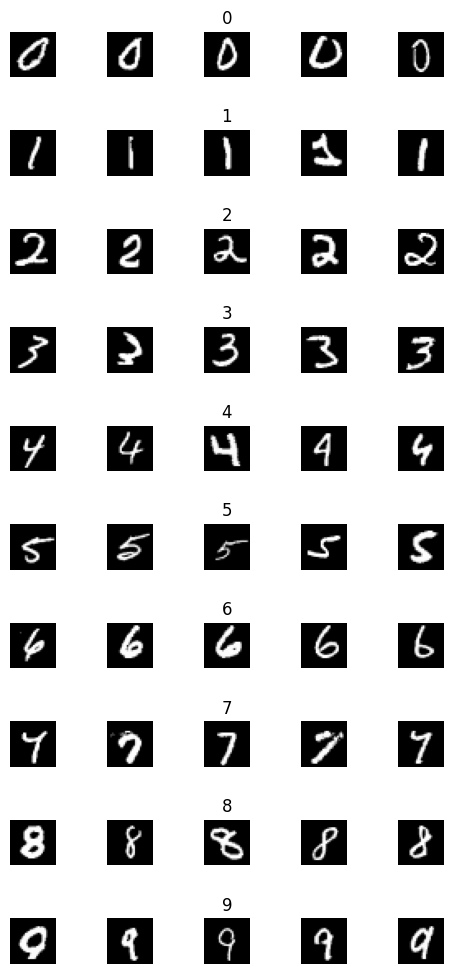

In [54]:
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


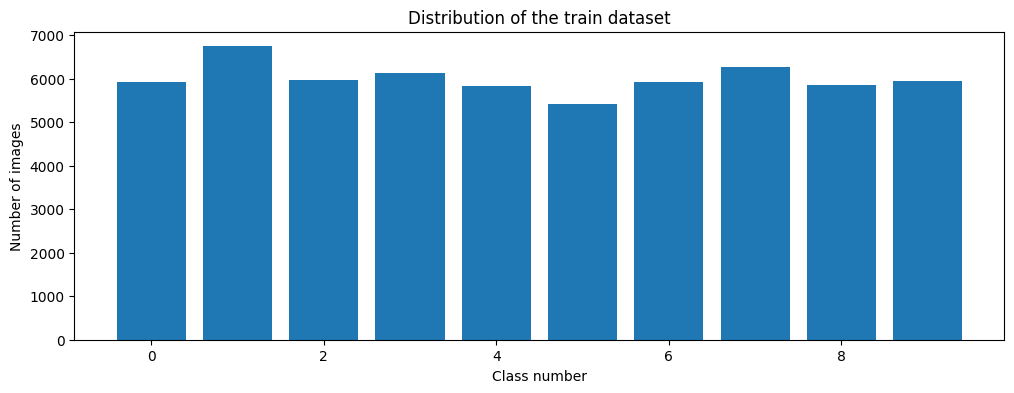

In [55]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [56]:
X_train = X_train.reshape(60000, 28, 28, 1)   # adding depth to the data by adding last 1 (for gray scale)
X_test = X_test.reshape(10000, 28, 28, 1)

In [57]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [58]:
X_train = X_train/255
X_test = X_test/255

In [59]:
# define the LeNet model function
def leNet_model():
  model = Sequential()
  # we are not padding, since handritten info is centerd, and don't have data at the edges
  # similarly we are not changing the strides, keeping them default
  # output of 1st convolution layer will be 24x24(after convolving without padding) x30(features)
  model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation='relu')) #(number of filter , touple fo filter size, shape of imput data)
  # after pooling the later will be 12x12 x30(depth, features)
  model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer with 2x2 pool size
  #let's add another conv layer, here let's reduce the number of filter by half
  # and reduce filter size to 3x3
  #but still computetionally it will be larger than 1st conv layers, since now we have 12x12x30 data instead of 28x28x1 data also considering there are 15 filters
  # which is 15X30x3x3 =4050 + bias 15 = 4065
  model.add(Conv2D(15, (3, 3), activation='relu'))
  #add pooling layer
  # output is 5x5x15
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # now need to flatten before fully connected network, as data is 3 dimentional, 5x5x15 to 1x375
  model.add(Flatten())
  # now add fully connected layer, which is old method
  model.add(Dense(500, activation='relu'))
  # add dropout layers, these will turn off the neurons while training to reduce the loss and imporve the accuracy
  model.add(Dropout(rate=0.5)) # recommended rate, 0 = no dropout, 1 = all layers dropout
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [60]:
model = leNet_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
history = model.fit(x=X_train, y=y_train, verbose=1, validation_split=0.1, epochs=10, batch_size=400, shuffle=True)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8275 - loss: 0.5155 - val_accuracy: 0.9833 - val_loss: 0.0540
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9759 - loss: 0.0778 - val_accuracy: 0.9867 - val_loss: 0.0441
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9841 - loss: 0.0500 - val_accuracy: 0.9887 - val_loss: 0.0415
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9853 - loss: 0.0457 - val_accuracy: 0.9888 - val_loss: 0.0426
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9875 - val_loss: 0.0391
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9918 - val_loss: 0.0322
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9870 - loss: 0.0397 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0

Text(0.5, 0, 'epoch')

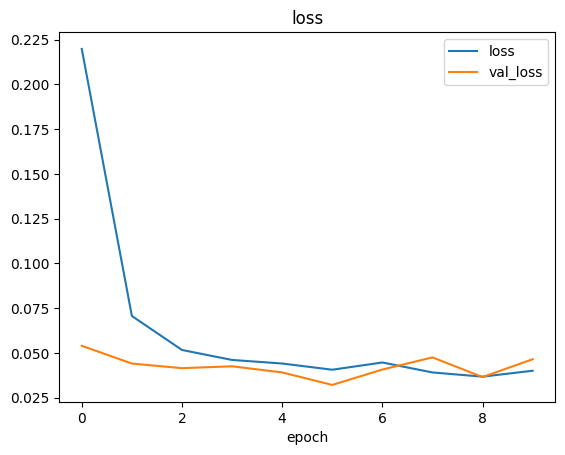

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

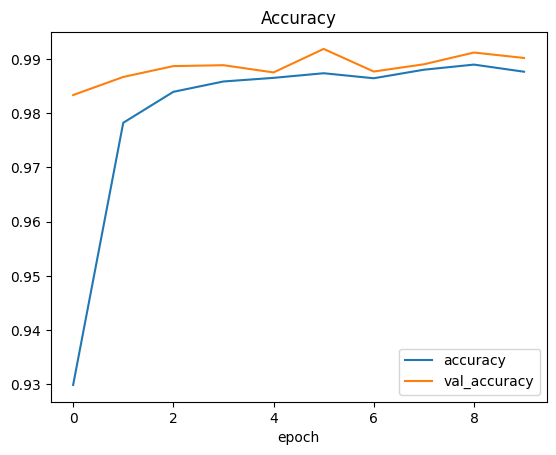

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [64]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score =', score[0])
print('Accuracy =', score[1])

<class 'list'>
Test score = 0.039689384400844574
Accuracy = 0.9894000291824341


<Response [200]>


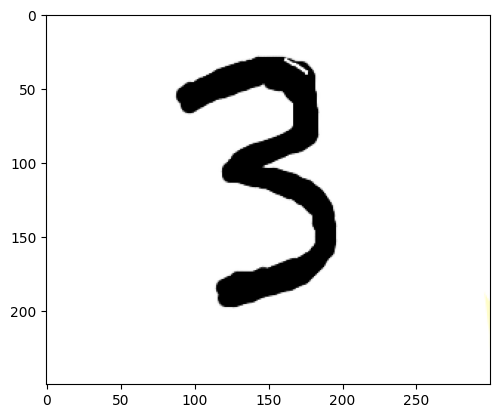

In [65]:
import requests
from PIL import Image
url = 'https://clipartmag.com/image/number-three-drawing-31.png'
response = requests.get(url, stream= True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28)


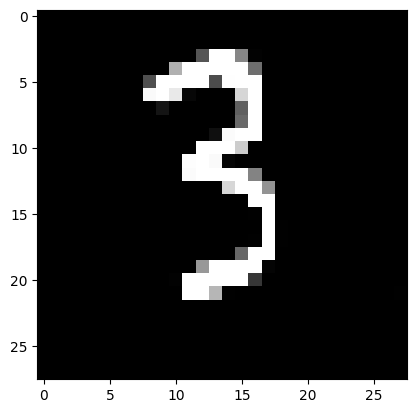

In [66]:
import cv2
img_array = np.asarray(img)

resized = cv2.resize(img_array, (130, 130))
resized = cv2.resize(resized, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image.shape)

In [67]:
image = image/255 #normalize
image = image.reshape(1,28, 28, 1)

In [68]:
prediction = model.predict(image)
print(prediction)
predicted_digit=np.argmax(prediction,axis=1)
print('Predicted digit is:', predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[[2.20346397e-16 4.64692439e-14 6.56252288e-13 9.99999762e-01
  1.44895438e-14 1.92137293e-07 1.06704034e-13 2.05612489e-11
  1.49592699e-11 5.54491518e-14]]
Predicted digit is: [3]


In [72]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


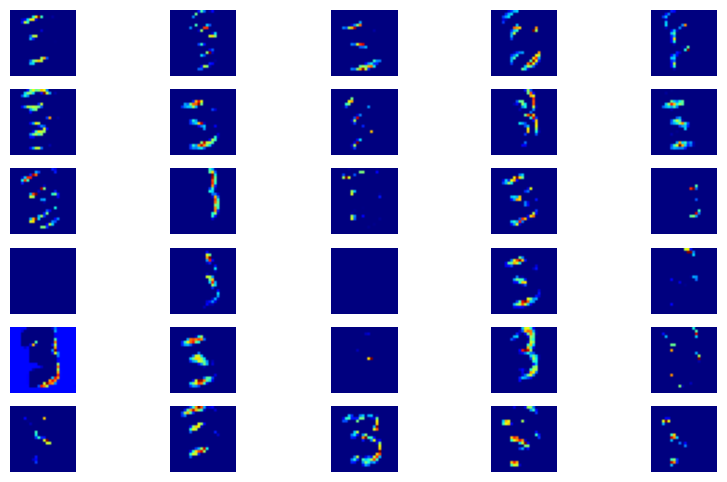

In [73]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

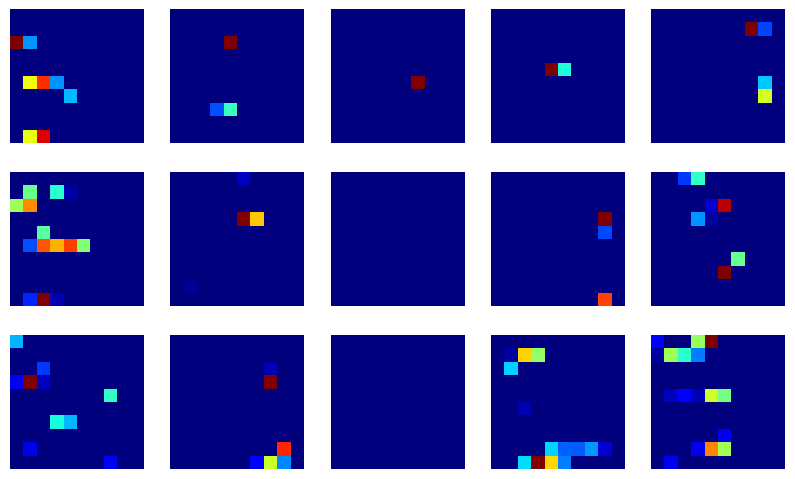

In [74]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')